In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


In [ ]:
import os
os.listdir()

['.config',
 'insurance (1).csv',
 '.ipynb_checkpoints',
 'insurance.csv',
 'sample_data']

In [ ]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None,
    age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520)

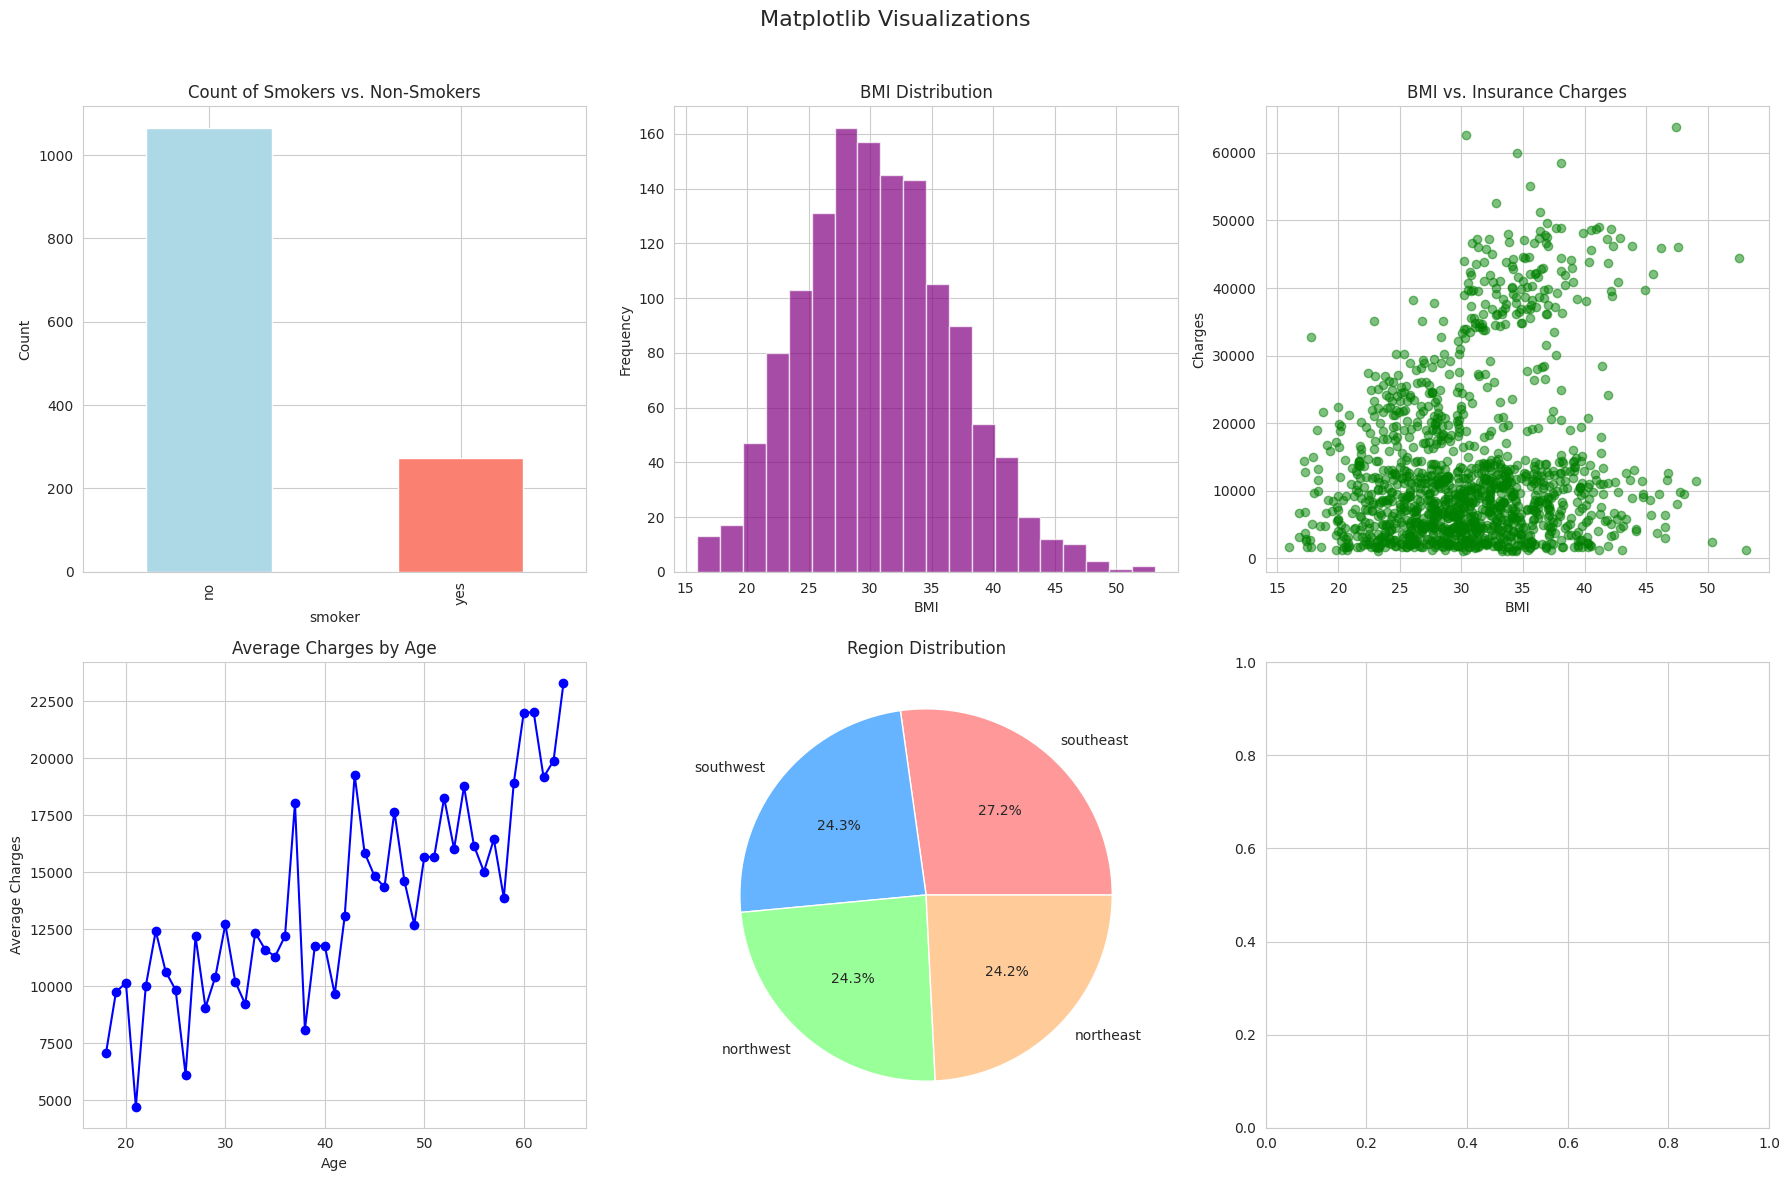

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Matplotlib Visualizations", fontsize=16)

df['smoker'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'], ax=axes[0, 0])
axes[0, 0].set_title("Count of Smokers vs. Non-Smokers")
axes[0, 0].set_ylabel("Count")

axes[0, 1].hist(df['bmi'], bins=20, color='purple', alpha=0.7)
axes[0, 1].set_title("BMI Distribution")
axes[0, 1].set_xlabel("BMI")
axes[0, 1].set_ylabel("Frequency")

axes[0, 2].scatter(df['bmi'], df['charges'], alpha=0.5, color='green')
axes[0, 2].set_title("BMI vs. Insurance Charges")
axes[0, 2].set_xlabel("BMI")
axes[0, 2].set_ylabel("Charges")

age_charges = df.groupby("age")["charges"].mean()
axes[1, 0].plot(age_charges.index, age_charges.values, marker='o', linestyle='-', color='blue')
axes[1, 0].set_title("Average Charges by Age")
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Average Charges")

df['region'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], ax=axes[1, 1])
axes[1, 1].set_title("Region Distribution")
axes[1, 1].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<ipython-input-42-b912acbeda02>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='region', y='charges', data=df, palette='Set2', ax=axes[1, 1])


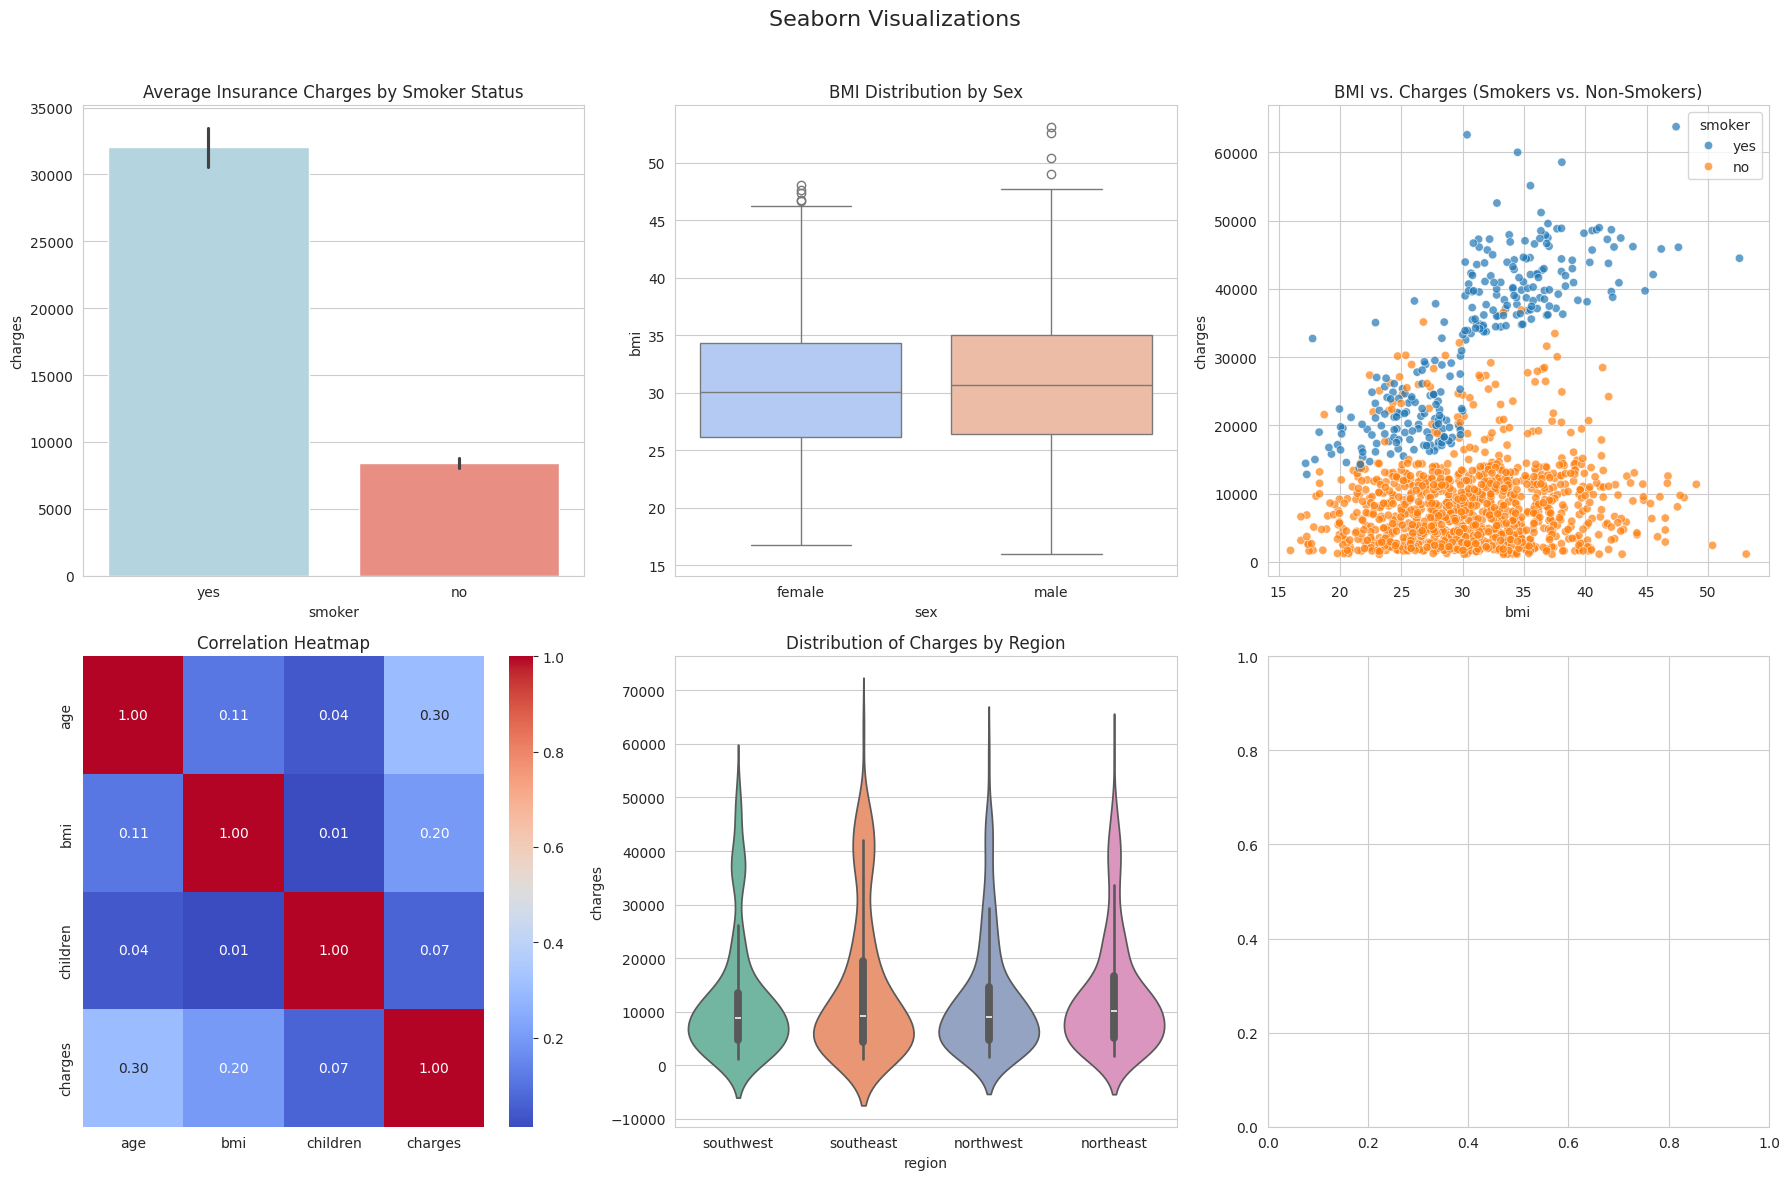

In [ ]:
df_numeric = df.select_dtypes(include=['number'])

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Seaborn Visualizations", fontsize=16)

sns.barplot(x='smoker', y='charges', hue='smoker', data=df, palette=['lightblue', 'salmon'], dodge=False, ax=axes[0, 0])
axes[0, 0].set_title("Average Insurance Charges by Smoker Status")

sns.boxplot(x='sex', y='bmi', hue='sex', data=df, palette='coolwarm', dodge=False, ax=axes[0, 1])
axes[0, 1].set_title("BMI Distribution by Sex")

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.7, ax=axes[0, 2])
axes[0, 2].set_title("BMI vs. Charges (Smokers vs. Non-Smokers)")

corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title("Correlation Heatmap")

sns.violinplot(x='region', y='charges', data=df, palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Charges by Region")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()